In [44]:
import datetime as dt 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline 
import os

In [2]:
df_river= pd.read_csv("river_data.csv")


In [3]:
print(df_river.info())
print(df_river.describe()) 
print(df_river.index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923304 entries, 0 to 923303
Data columns (total 4 columns):
station_no     923304 non-null int64
date           923304 non-null object
discharge      923304 non-null float64
water_level    923304 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 28.2+ MB
None
         station_no      discharge    water_level
count  9.233040e+05  923304.000000  923304.000000
mean   6.482084e+06     416.427735    -484.957980
std    2.563108e+05     822.960147     592.618697
min    6.335020e+06    -999.000000    -999.000000
25%    6.335116e+06      10.530000    -999.000000
50%    6.335430e+06      58.292500    -999.000000
75%    6.435060e+06     433.239000     122.283250
max    6.935540e+06   11885.000000    1064.000000
RangeIndex(start=0, stop=923304, step=1)


In [13]:
df_river.date = pd.to_datetime(df_river.date, format='%Y-%m-%d')
df_river= df_river.set_index('date')

In [20]:
#df_river_DUSKOL = df_river[(df_river.station_no == 6335050) | (df_river.station_no == 6335060)]

In [65]:
df_river['year'] = [d.year for d in df_river.index]
df_river['month'] = [d.strftime('%b') for d in df_river.index]
#df_river['Month'] = [d.month for d in df_river.index]
df_river['day'] = [d.day for d in df_river.index]



In [20]:
years = df_river['year'].unique()
years.shape

(48,)

In [21]:
station_ID = df_river['station_no'].unique()
station_ID.shape

(62,)

In [22]:
df_river_DUS = df_river[df_river.station_no == 6335050]


In [23]:
df_river_KOL= df_river[df_river.station_no == 6335060]

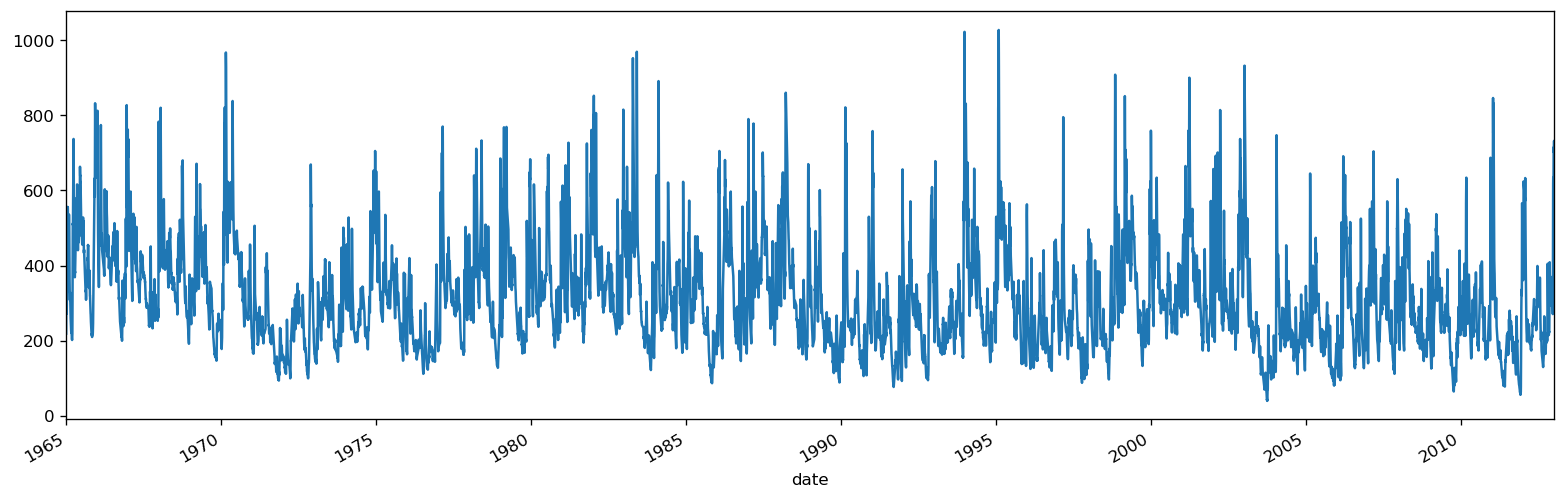

In [17]:
plt.figure(figsize=(16,5), dpi= 120)

df_river_DUS["water_level"].plot()

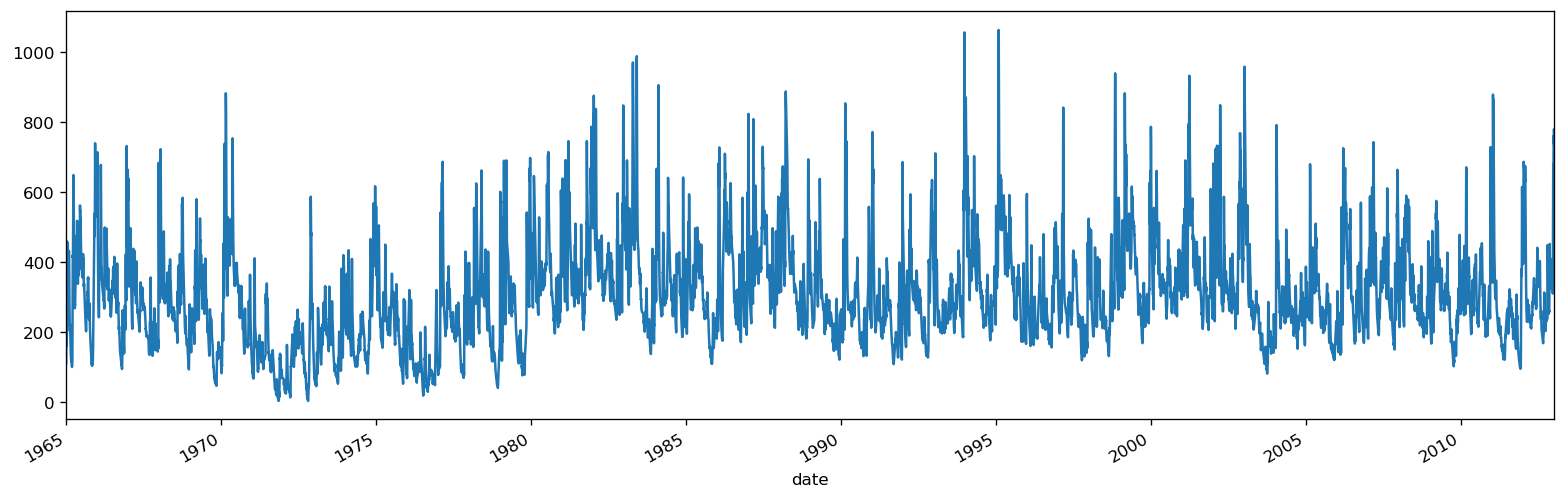

In [18]:
plt.figure(figsize=(16,5), dpi= 120)

df_river_KOL["water_level"].plot()

Text(0.5, 1.0, 'Month-wise Box Plot KOL \n(The Seasonality)')

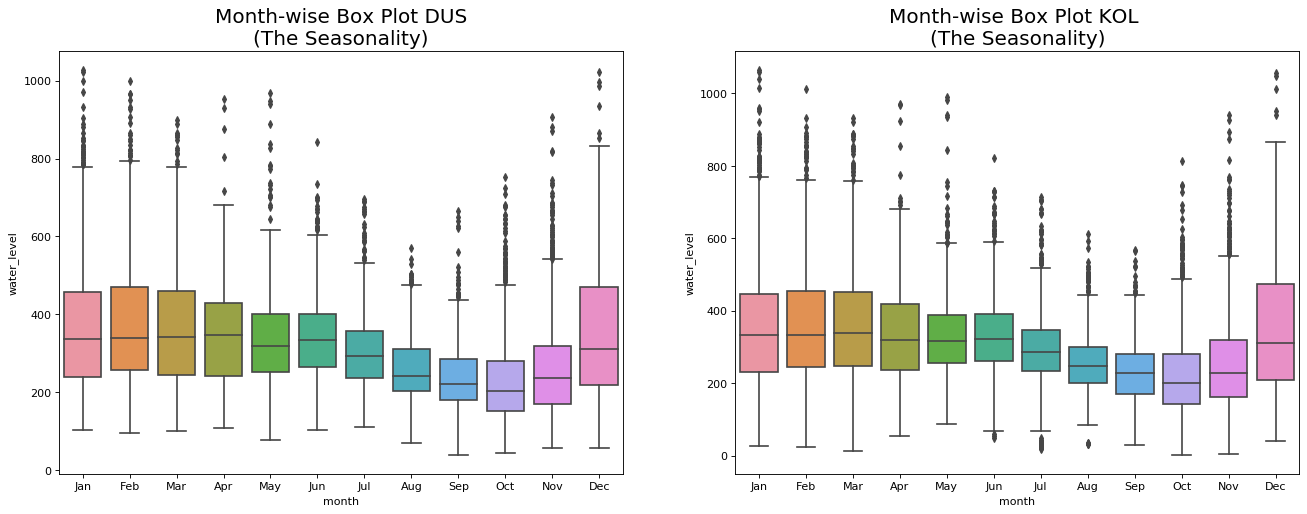

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='month', y='water_level', data=df_river_DUS, ax=ax[0])
sns.boxplot(x='month', y='water_level', data=df_river_KOL)
ax[0].set_title('Month-wise Box Plot Dusseldorf\n(The Seasonality)', fontsize=18)
ax[1].set_title('Month-wise Box Plot Cologne \n(The Seasonality)', fontsize=18)

Text(0.5, 1.0, 'year-wise Box Plot Dusseldorf and Cologne\n(The Seasonality)')

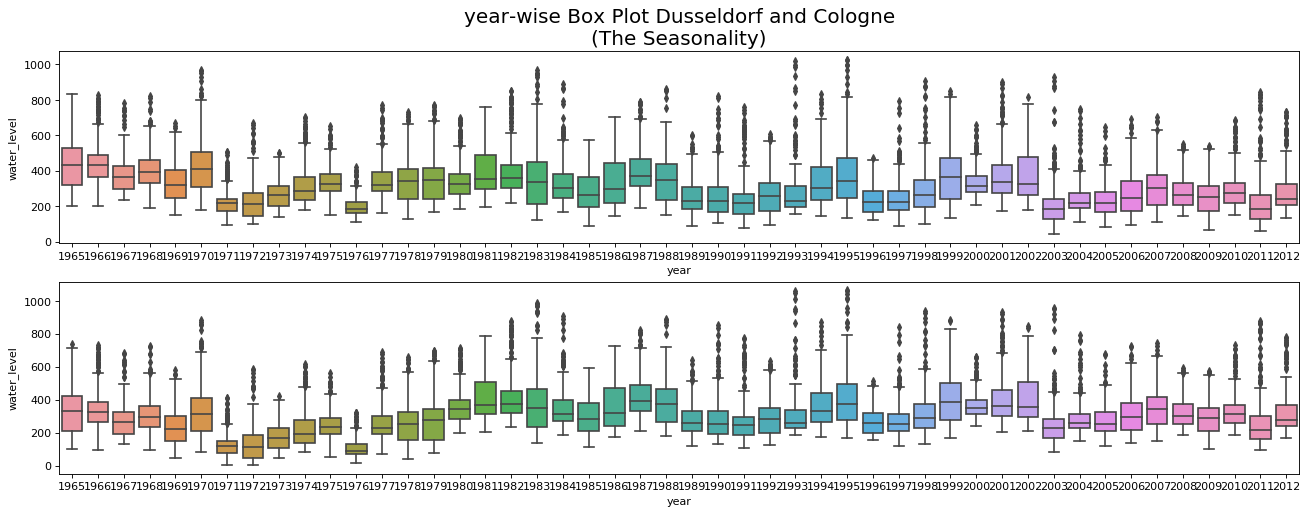

In [52]:
fig, ax = plt.subplots(2, 1, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='water_level', data=df_river_DUS, ax=ax[0])
sns.boxplot(x='year', y='water_level', data=df_river_KOL)
ax[0].set_title('year-wise Box Plot Dusseldorf and Cologne\n(The Seasonality)', fontsize=18)
#ax[1].set_title('year-wise Box Plot Cologne \n(The Seasonality)', fontsize=18)

Text(0.5, 1.0, 'day-wise Box Plot Dusseldorf and Cologne\n(The Seasonality)')

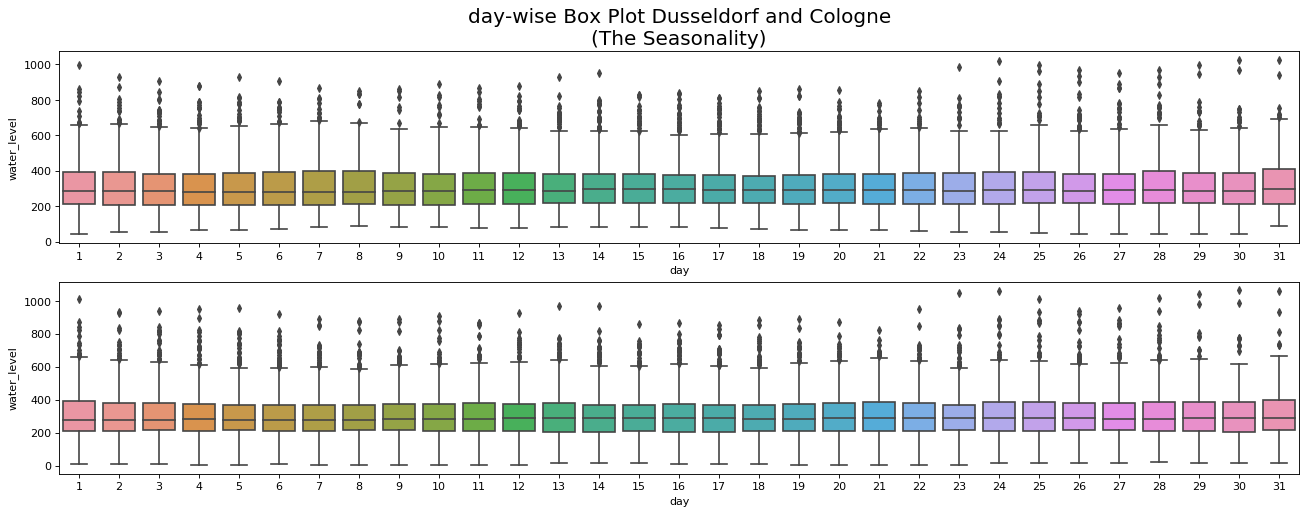

In [57]:
fig, ax = plt.subplots(2, 1, figsize=(20,7), dpi= 80)
sns.boxplot(x='day', y='water_level', data=df_river_DUS, ax=ax[0])
sns.boxplot(x='day', y='water_level', data=df_river_KOL)
ax[0].set_title('day-wise Box Plot Dusseldorf and Cologne\n(The Seasonality)', fontsize=18)


#fig = plt.figure(figsize=(20,7), dpi= 100)
#sns.boxplot(x='day', y='water_level', data=df_river_DUS)
#fig.suptitle('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
#plt.show()

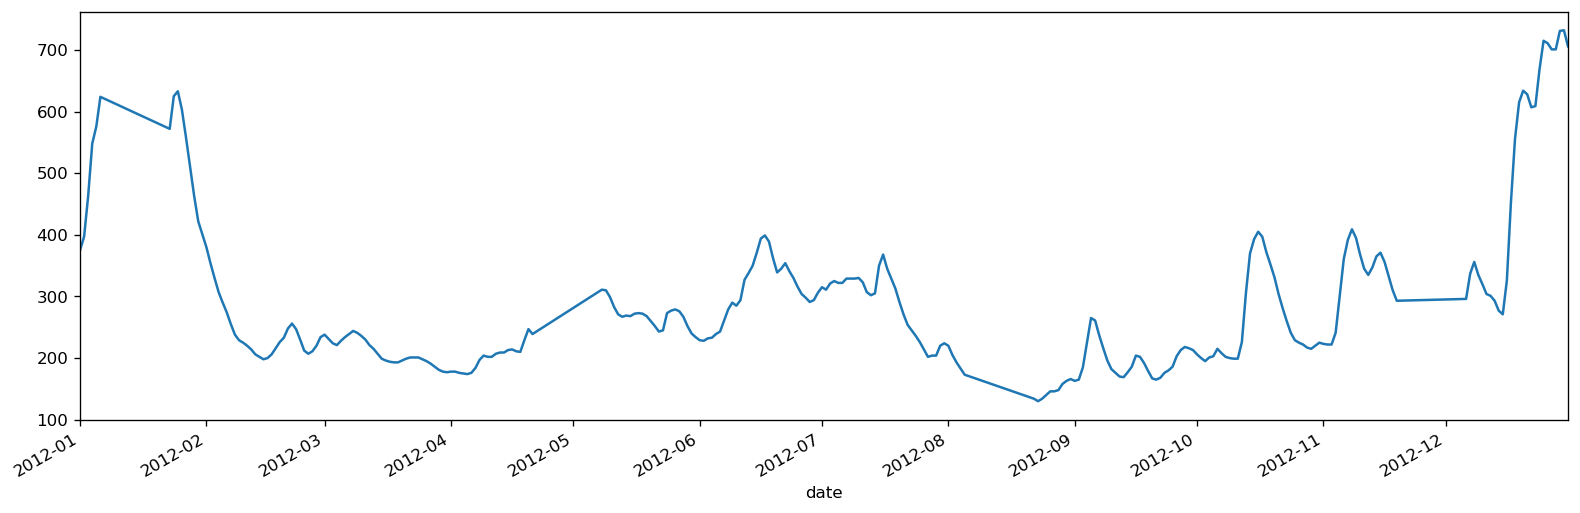

In [29]:
df_river_DUS_2012 = df_river_DUS[df_river_DUS.index.year == 2012]

plt.figure(figsize=(16,5), dpi= 120)

df_river_DUS_2012['water_level'].plot()

In [45]:
stations = set(df_river.station_no.tolist())
print(stations)

if not os.path.exists('./stations'):
    os.makedirs('./stations')

for s in stations:
    station_pd = df_river[df_river.station_no == s]
    # station_pd = station_pd.drop('station_no', 1)
    station_pd['delta1'] = station_pd.water_level.shift(1) - station_pd.water_level
    station_pd['delta2'] = station_pd.water_level.shift(2) - station_pd.water_level
    station_pd['delta3'] = station_pd.water_level.shift(3) - station_pd.water_level
    station_pd.to_csv(f'./stations/station_{s}_river_data.csv')

{6935300, 6335621, 6935301, 6935302, 6335240, 6335115, 6335116, 6335500, 6935051, 6935053, 6935054, 6935055, 6935060, 6335125, 6335640, 6935460, 6335400, 6335020, 6335150, 6335410, 6336050, 6335030, 6335031, 6335032, 6335800, 6335170, 6335045, 6335301, 6335302, 6335304, 6335050, 6335180, 6935500, 6335310, 6335060, 6335190, 6335450, 6335070, 6335710, 6335200, 6335076, 6335460, 6335080, 6335081, 6335082, 6335083, 6935020, 6935145, 6935400, 6935401, 6335600, 6335601, 6335602, 6335603, 6335604, 6335730, 6335350, 6335351, 6336500, 6435060, 6935540, 6335100}


C:\Users\Marimo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Marimo\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Marimo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

Prediction with simple model and including value in future into train(which is actually not allowed) 

In [77]:
import numpy as np  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

df_Delta_DUS = pd.read_csv('stations/station_6335050_river_data.csv')
df_Delta_KOL = pd.read_csv('stations/station_6335060_river_data.csv')


In [162]:
df_Delta_DUS_dNull = df_Delta_DUS.dropna()
df_Delta_KOL_dNull = df_Delta_KOL.dropna()

In [74]:
#label_encoder = LabelEncoder()
#label1 = label_encoder.fit_transform(np.array(df_Delta_DUS['month']).reshape(-1,1))
#label2 = label_encoder.fit_transform(np.array(df_Delta_KOL['month']).reshape(-1,1))

#onehot_encoder = OneHotEncoder(sparse=False)
#df_Delta_DUS['Month_OHE'] = onehot_encoder.fit_transform(label1.reshape(-1,1))
#df_Delta_KOL['Month_OHE'] = onehot_encoder.fit_transform(label2.reshape(-1,1))

C:\Users\Marimo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Marimo\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Marimo\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in ver

In [171]:
X = np.array(df_Delta_DUS_dNull.discharge).reshape(-1,1)
#y0 = np.array(df_Delta_DUS.water_level).reshape(1,-1)
y1 = np.array(df_Delta_DUS_dNull.delta1).reshape(-1,1)
y2 = np.array(df_Delta_DUS_dNull.delta2).reshape(-1,1)
y3 = np.array(df_Delta_DUS_dNull.delta3).reshape(-1,1)



In [172]:
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, train_size=0.6, test_size= 0.4)
regressor = LinearRegression()  
regressor.fit(X_train, y1_train)
#df_coeff = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
#coeff_df
y1_pred = regressor.predict(X_test)
print('R square of Delta1 in DUS:',  r2_score(y1_test, y1_pred))  

#print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))  
#print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred))  
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))

R square of Delta1: 0.005902500677979594


In [173]:
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, train_size=0.6, test_size= 0.4)
regressor = LinearRegression()  
regressor.fit(X_train, y2_train)
#df_coeff = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
#coeff_df
y2_pred = regressor.predict(X_test)
print('R square of Delta2  in DUS:',  r2_score(y2_test, y2_pred))  


R square of Delta1: 0.031144744602660257


In [174]:
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, train_size=0.6, test_size= 0.4)
regressor = LinearRegression()  
regressor.fit(X_train, y3_train)
#df_coeff = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
#coeff_df
y3_pred = regressor.predict(X_test)
print('R square of Delta3 in DUS:',  r2_score(y3_test, y3_pred))  


R square of Delta3: 0.07579708490581893
